# Classification_Mini_Project_2

## Project Brief Classification – House Grade Prediction

### House Grade Classification

Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way,  the search for the house can be narrowed down   by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) – E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.


### Business Objective

●Build a predictive model to determine the Grade of house (The grades are A,B,C,D, and E)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,confusion_matrix,roc_auc_score
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
house_df=pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house_df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [3]:
house_df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [4]:
house_df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [5]:
house_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [6]:
df=house_df.copy()

In [7]:
cols = ['roof','Grade']

df[cols] = df[cols].apply(lambda x: x. astype('category'))

df.dtypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

In [8]:
label_encoder = preprocessing.LabelEncoder()
df[cols] = df[cols].apply(label_encoder.fit_transform)

df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [9]:
numerics=['int64','int32','float64','float32','int16','int16']
a=df.select_dtypes(include=numerics)
scalar= StandardScaler()
df1= pd.DataFrame(scalar.fit_transform(a.to_numpy()),columns=a.columns)
df1

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,-1.731474,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,0.874159
1,-1.730319,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.874159
2,-1.729164,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,-0.025490
3,-1.728009,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.874159
4,-1.726855,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,0.874159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.726855,0.774617,1.392227,0.597712,0.283580,0.553988,0.971733,0.944209,1.307097,0.608580,1.128060,-0.873093,0.816550,-0.925139
2996,1.728009,-1.615123,1.392227,1.821279,1.449776,1.113949,0.971733,1.375079,-0.580343,1.842187,1.526681,0.307560,-0.052792,-1.824789
2997,1.729164,0.140604,-0.015248,-0.625854,-0.882616,-0.565934,-1.029090,-1.004968,-1.187019,0.608580,1.412789,1.488214,-0.310245,0.874159
2998,1.730319,-1.566353,1.392227,1.209496,1.449776,1.113949,-1.029090,-1.004968,-1.187019,1.842187,-1.092829,-0.282766,0.731908,-0.925139


In [10]:
corr= df1.corr()
corr

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


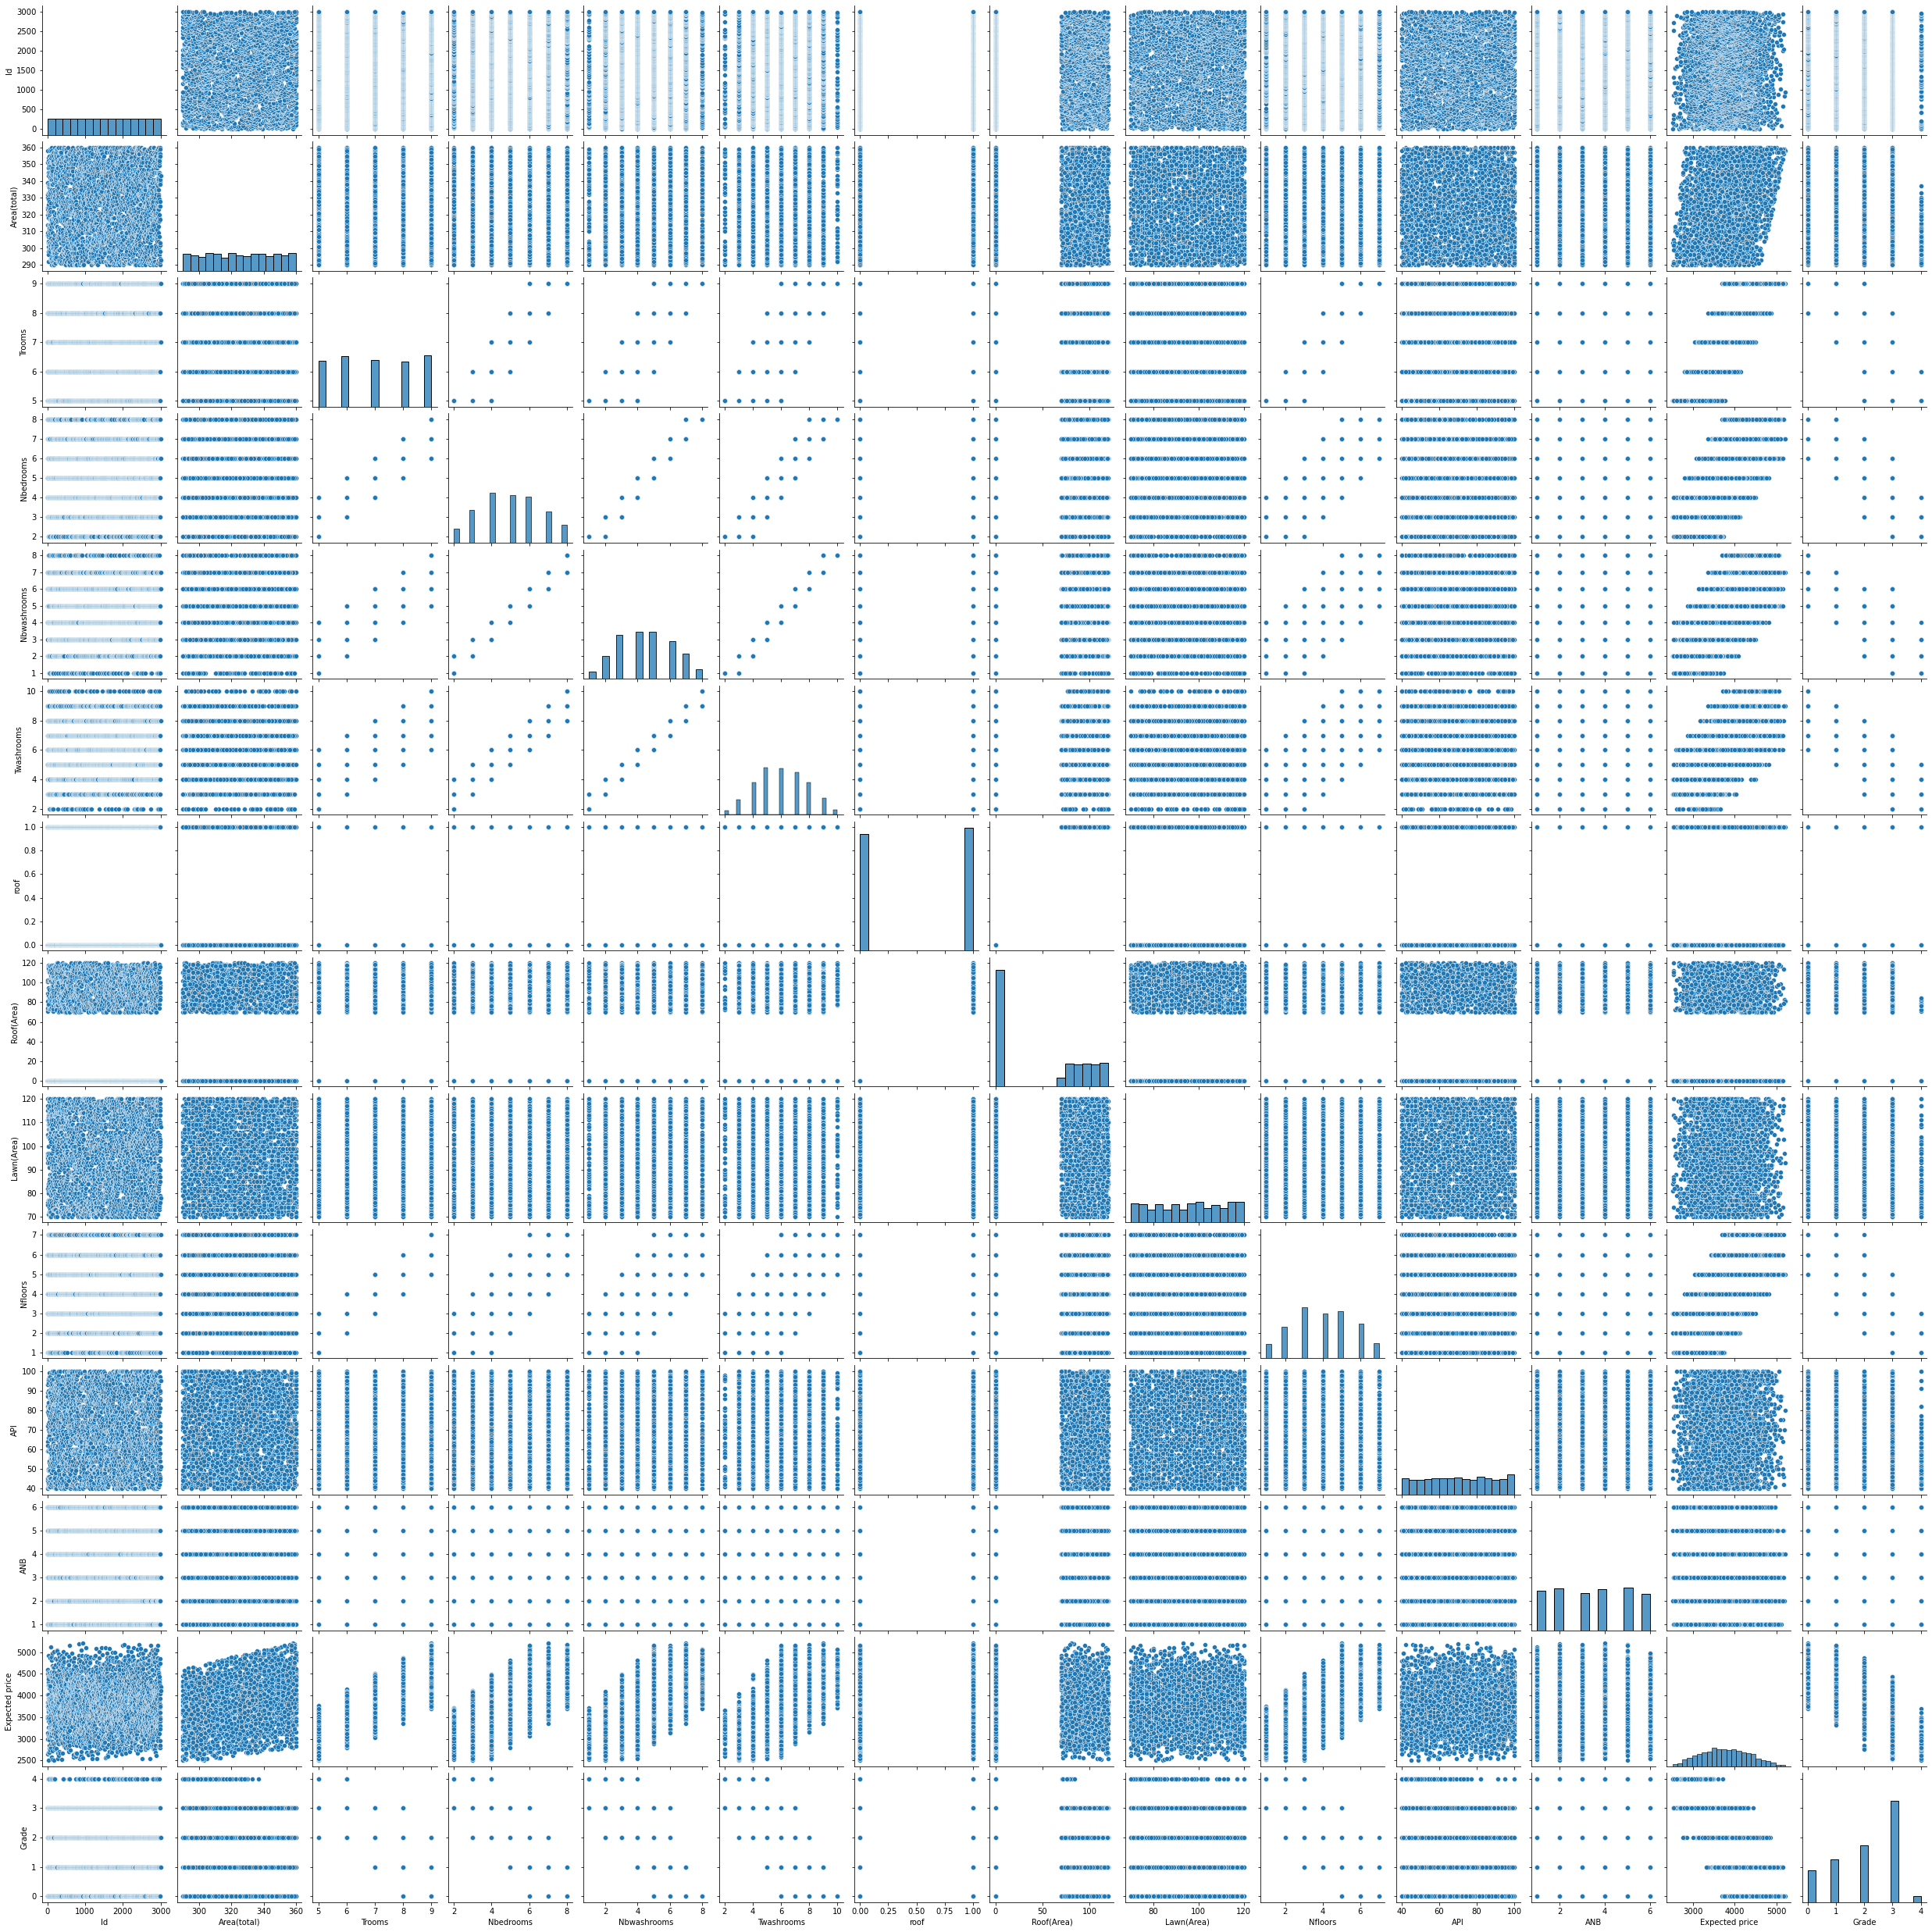

In [11]:
sb.pairplot(df)

<AxesSubplot:>

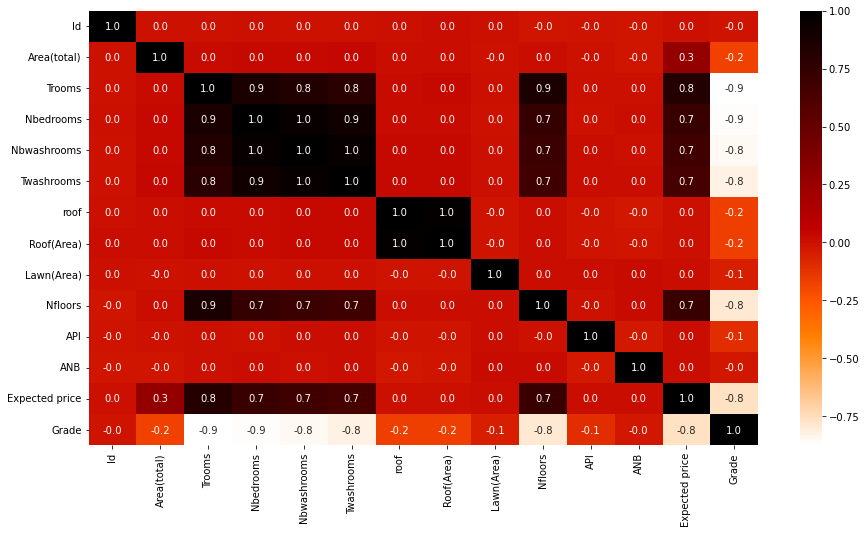

In [12]:
plt.figure(figsize=(15,8))
sb.heatmap(corr,annot=True,fmt='.1f',cbar=True,cmap='gist_heat_r')

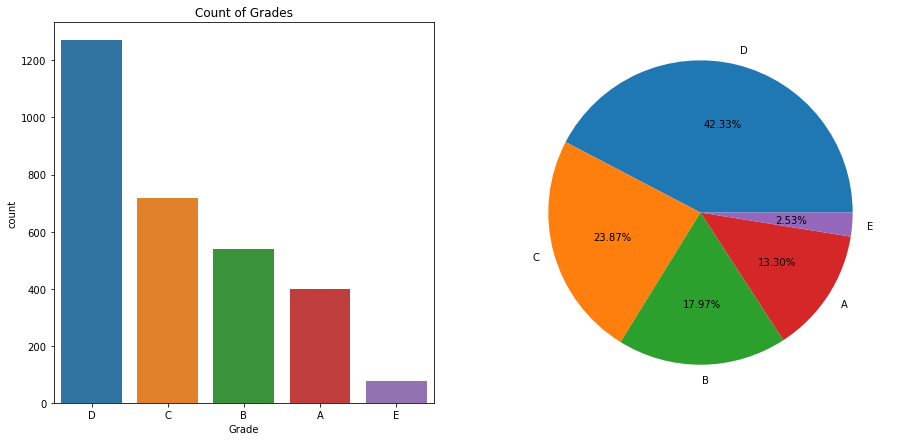

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Grades")                  
percentage = house_df['Grade'].value_counts()         
labels = list(house_df['Grade'].value_counts().index) 

sb.countplot(x = house_df['Grade'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

In [14]:
#### The Availability of Grades C and D are high

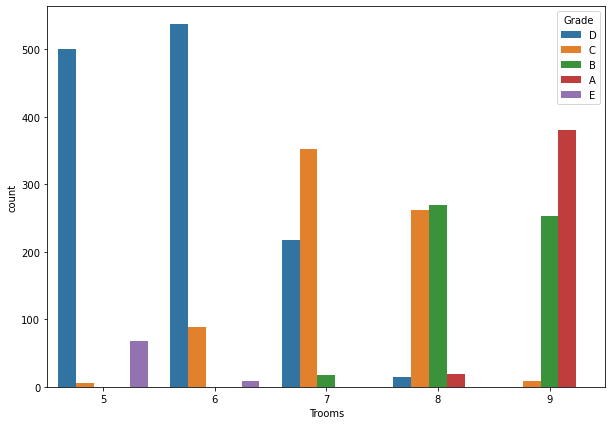

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
sb.countplot(x = "Trooms", hue = "Grade", data = house_df)
plt.show()

#### Only Grade D and C are available in all types of Rooms

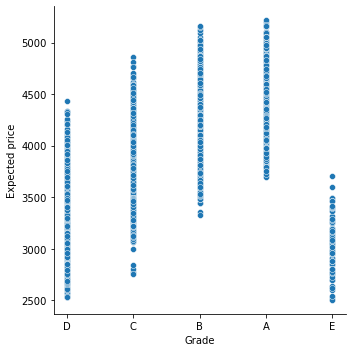

In [16]:
plt.figsize=(20,7)
sb.relplot(x = "Grade", y = 'Expected price',data = house_df)

In [17]:
#### Two Best Grades A and B has High Expected Price

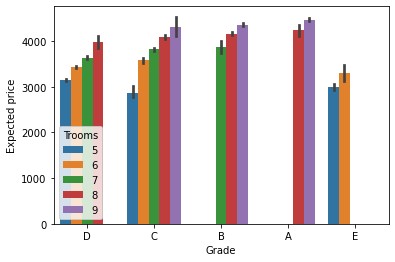

In [18]:
sb.barplot(data = house_df,x = "Grade", hue = "Trooms", y = 'Expected price',estimator=np.mean)
plt.show()

In [19]:
#### Grade C contains all types of Rooms

In [20]:

y =  np.array(df['Grade'])
X =  np.array(df1.drop(['Grade','Id'],axis=1))
kf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
#for train_index, test_index in kf.split(X,y):
    #print("Train data",train_index,"Test data",test_index)
    #X_train,X_test = X[train_index], X[test_index]
    #y_train,y_test = y[train_index], y[test_index]

## NAIVE BAYES

In [21]:
model1 = GaussianNB()
#model1.fit(X_train, y_train)

In [22]:
scores=['accuracy','f1_weighted','precision_weighted','recall_weighted']

In [23]:
n_scores = cross_validate(model1, X, y, scoring=scores, cv=kf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
accuracy1=mean(n_scores['test_accuracy'])
f1_1=mean(n_scores['test_f1_weighted'])
precision1=mean(n_scores['test_precision_weighted'])
recall1=mean(n_scores['test_recall_weighted'])

## DECISION TREE CLASSIFIER

In [24]:
model2 = DecisionTreeClassifier(max_depth=5)
#model2.fit(X_train,y_train)

In [25]:
n_scores2 = cross_validate(model2, X, y, scoring=scores, cv=kf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
accuracy2=mean(n_scores2['test_accuracy'])
f1_2=mean(n_scores2['test_f1_weighted'])
precision2=mean(n_scores2['test_precision_weighted'])
recall2=mean(n_scores2['test_recall_weighted'])

## RANDOM FOREST CLASSIFIER

In [26]:
model3 = RandomForestClassifier()

In [27]:
n_scores3 = cross_validate(model3, X, y, scoring=scores, cv=kf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
accuracy3=mean(n_scores3['test_accuracy'])
f1_3=mean(n_scores3['test_f1_weighted'])
precision3=mean(n_scores3['test_precision_weighted'])
recall3=mean(n_scores3['test_recall_weighted'])

## BOOSTING

In [28]:
model4 = AdaBoostClassifier()

In [29]:
n_scores4 = cross_validate(model4, X, y, scoring=scores, cv=kf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
accuracy4=mean(n_scores4['test_accuracy'])
f1_4=mean(n_scores4['test_f1_weighted'])
precision4=mean(n_scores4['test_precision_weighted'])
recall4=mean(n_scores4['test_recall_weighted'])

## STACKING

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [31]:
def get_stacking():

    level0 = list()
    #level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    #level0.append(('rf', RandomForestRegressor()))
    
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
    return model

In [32]:
model5 = get_stacking()

In [33]:
n_scores5 = cross_validate(model5, X, y, scoring=scores, cv=kf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
accuracy5=mean(n_scores5['test_accuracy'])
f1_5=mean(n_scores5['test_f1_weighted'])
precision5=mean(n_scores5['test_precision_weighted'])
recall5=mean(n_scores5['test_recall_weighted'])

## COMPARISON

In [34]:
comparison = pd.DataFrame({'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5],'F1_Score':[f1_1,f1_2,f1_3,f1_4,f1_5], 'Precision_Score':[precision1,precision2,precision3,precision4,precision5], 'Recall_Score':[recall1,recall2,recall3,recall4,recall5]}, index = ['Bayes','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison

,Accuracy,F1_Score,Precision_Score,Recall_Score
Bayes,0.799333,0.802630,0.810476,0.799333
DECISIONTREE,0.806000,0.798324,0.800656,0.806000
RANDOM FOREST,0.889000,0.885058,0.890152,0.889000
BOOSTING,0.588000,0.558764,0.593284,0.588000
STACKING,0.932333,0.931742,0.932866,0.932333


#### STACKING IS SHOWING BEST ACCURACY

In [35]:
ypred5 = cross_val_predict(model5, X, y, cv=kf)
ypred5

array([3, 3, 2, ..., 3, 1, 2])

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, ypred5)
cm

array([[ 363,   36,    0,    0,    0],
       [  28,  488,   23,    0,    0],
       [   0,   27,  654,   35,    0],
       [   0,    0,   23, 1243,    4],
       [   0,    0,    0,   23,   53]], dtype=int64)

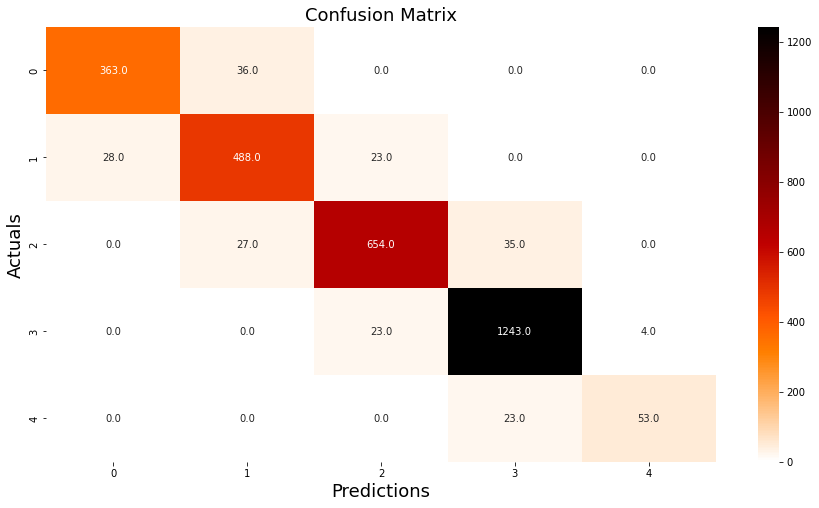

In [37]:
plt.figure(figsize=(15,8))
sb.heatmap(cm,annot=True,fmt='.1f',cbar=True,cmap='gist_heat_r')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### GRADES C and D are having High TRUE Positive values

In [38]:
df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

Enter the Col num(x-axis): 5
Enter the Col num(y-axis): 12


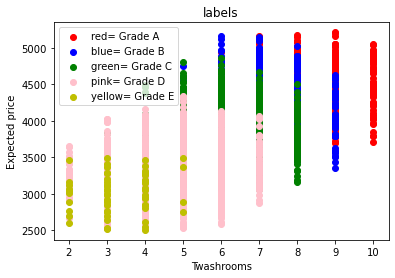

In [39]:
c= df.columns
a= int(input('Enter the Col num(x-axis): '))
b= int(input('Enter the Col num(y-axis): '))

X = df.iloc[:,[a,b]].values
plt.scatter(X[ypred5==0, 0], X[ypred5==0, 1], c='red',label = 'red= Grade A')
plt.scatter(X[ypred5==1, 0], X[ypred5==1, 1], c='blue',label = 'blue= Grade B')
plt.scatter(X[ypred5==2, 0], X[ypred5==2, 1], c='g',label = 'green= Grade C')
plt.scatter(X[ypred5==3, 0], X[ypred5==3, 1], c='pink',label = 'pink= Grade D')
plt.scatter(X[ypred5==4, 0], X[ypred5==4, 1], c='y',label = 'yellow= Grade E')
plt.title('labels')
    
plt.xlabel(c[a])
plt.ylabel(c[b])
plt.legend()
plt.show()

Conclusion: \
1.In most of cases Grade C and D have more variations or availability than A and B \
2.Considering A and B, it has High Expected Price and considered as best grade rooms \
3.But Grade A and B are not available in low price \
4.So, if average price and good amenities considered then Grade C is available \
5. At last, the ones having demands for best amenties and can pay the high price can go with Grade A and B \
6. and the ones cannot pay well but wants good amenities can go with Grade C